In [1]:
    import pandas as pd
    import numpy as np
    
    df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기
    df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0,8.136.0 build 3 50908,2024-10-21 14:15:31,8.136.0 build 3 50908
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0,NaN,2024-10-21 14:08:15,NaN
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0,8.131.0 build 3 50829,2024-10-21 13:54:11,8.131.0 build 3 50829
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0,8.136.0 build 3 50908,2024-10-21 13:30:42,8.136.0 build 3 50908
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0,8.136.0 build 3 50908,2024-10-21 13:28:43,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [2]:
print(df.shape) 
print(df.columns)

(117134, 8)
Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [3]:
df['score'].dtype

dtype('int64')

In [4]:
df = df.iloc[:,0:5]
df.head()

,reviewId,userName,content,score,thumbsUpCount
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0


In [5]:
df.tail()

,reviewId,userName,content,score,thumbsUpCount
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0
117133,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0


In [6]:
# 전처리 함수
import re
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [7]:
df['reviewId'] = df['reviewId'].apply(preprocess_text)
df['userName'] = df['userName'].apply(preprocess_text)
df['content'] = df['content'].apply(preprocess_text)
print(df)

               reviewId             userName  \
0                   ebd       sylviah chichi   
1          babdafcfcedd        marilyn goeda   
2        cdebcabdabdeab            nikhil pk   
3          dbccccacaebd  mmesoma eberechukwu   
4             deebeecea    keabetswe monaise   
...                 ...                  ...   
117129  aeadeaaedaccdac        a google user   
117130     fedfacebcacf         captain jeoy   
117131   acfabfbcedebac             suryansh   
117132           ffcbca        a google user   
117133      dceacaabdbe           suraj soni   

                                                  content  score  \
0       great app on the move  i can watch my movies a...      5   
1                                                    good      5   
2       need to improve and to update some error durin...      3   
3       netflix is a nice appbut not all the movies ar...      3   
4       not much availability considering options on w...      3   
...            

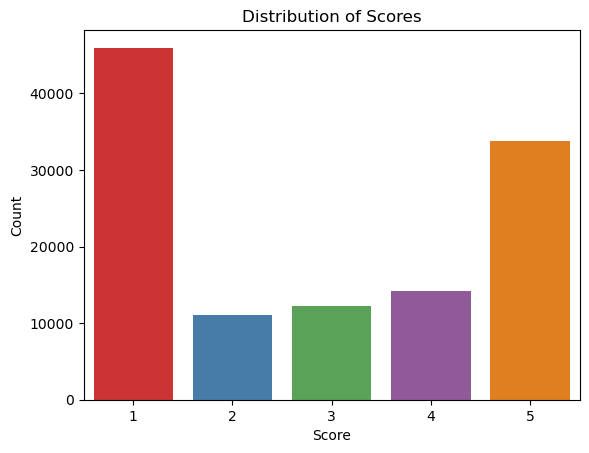

In [8]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트 (없으면 설치 바랍니다)
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

score_counts = df['score'].value_counts().reset_index() # score 컬럼의 값에 대한 빈도수를 계산한 후 시각화
score_counts.columns = ['score','score_count']
# score_counts

sns.barplot(x='score', y='score_count', data=score_counts, palette='Set1', hue = 'score', legend=False)
# # sns.countplot(x=df['score']) : countplot 이용한 방법 , 간단하게 표현가능
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()